<a href="https://colab.research.google.com/github/vvinayakkk/IceCream_SalesPred/blob/main/icecream_pred_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [6]:
ice_cream = pd.read_csv('./icecream_temp.csv')
ice_cream

,temperature,sales
0,60,39.69
1,80,61.59
2,58,33.44
3,96,80.02
4,95,80.75
...,...,...
360,50,22.89
361,89,73.16
362,81,64.23
363,73,55.01


In [7]:

X = ice_cream["temperature"].values.reshape(-1, 1)
y = ice_cream["sales"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (365, 1) (365, 1)


Text(0, 0.5, 'Ice Cream Sales')

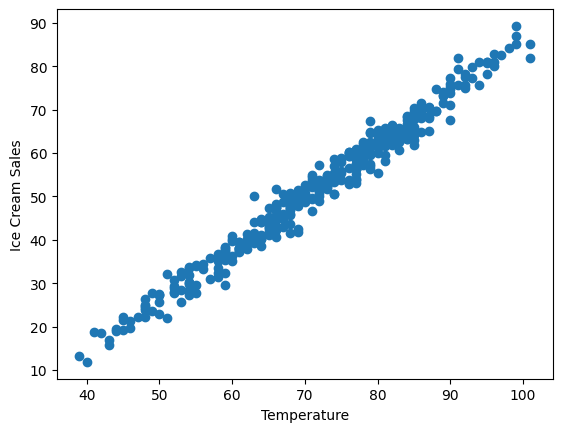

In [8]:
plt.scatter(X, y)
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape[0]/365, X_test.shape[0]/365 )

0.7479452054794521 0.25205479452054796


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[1.19149198]]
y-axis intercept:  [-33.65495298]


In [12]:

model.score(X_test, y_test)

0.9786159273079298

In [13]:
temp = np.array([row[0] for row in X]).reshape(-1, 1)
x_min = np.array([[temp.min()]])
x_max = np.array([[temp.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[39]]
Max X Value: [[101]]


In [14]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Min Y Value: {y_min}")
print(f"Max Y Value: {y_max}")

Min Y Value: [[12.81323416]]
Max Y Value: [[86.68573679]]


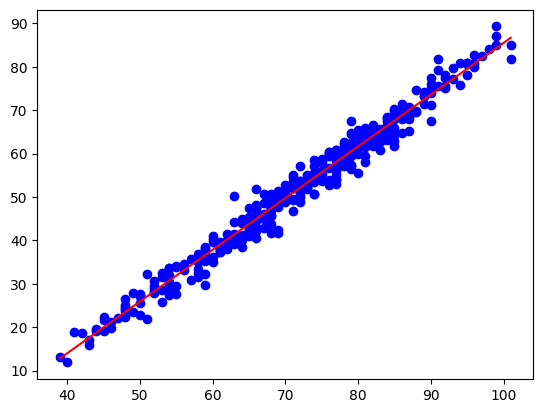

In [15]:

plt.scatter(temp, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')